<h1>Modeling for the Imbalanced Classification of Good and Bad Credit</h1><p>Misclassification errors on the minority class are more important than other types of prediction errors for some imbalanced classification tasks. 

One example is the problem of classifying bank customers as to whether they should receive a loan or not. Giving a loan to a bad customer marked as a good customer results in a greater cost to the bank than denying a loan to a good customer marked as a bad customer.</p><p>This requires careful selection of a performance metric that both promotes minimizing misclassification errors in general, and favors minimizing one type of misclassification error over another.</p><p>The <strong>German credit dataset</strong> is a standard imbalanced classification dataset that has this property of differing costs to misclassification errors. Models evaluated on this dataset can be evaluated using the <a href="#">Fbeta-Measure</a> that provides a way of both quantifying model performance generally, and captures the requirement that one type of misclassification error is more costly than another.</p>

<h2>German Credit Dataset</h2><p>In this project, we will use a standard imbalanced machine learning dataset referred to as the “<a href="https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)">German Credit</a>” dataset or simply “<em>German</em>.”</p><p>The dataset was used as part of the Statlog project, a European-based initiative in the 1990s to evaluate and compare a large number (at the time) of machine learning algorithms on a range of different classification tasks. The dataset is credited to Hans Hofmann.</p><p>The german credit dataset describes financial and banking details for customers and the task is to determine whether the customer is good or bad. The assumption is that the task involves predicting whether a customer will pay back a loan or credit.</p>

<p>The dataset includes 1,000 examples and 20 input variables, 7 of which are numerical (integer) and 13 are categorical.</p><ul>
<li>Status of existing checking account</li>
<li>Duration in month</li>
<li>Credit history</li>
<li>Purpose</li>
<li>Credit amount</li>
<li>Savings account</li>
<li>Present employment since</li>
<li>Installment rate in percentage of disposable income</li>
<li>Personal status and sex</li>
<li>Other debtors</li>
<li>Present residence since</li>
<li>Property</li>
<li>Age in years</li>
<li>Other installment plans</li>
<li>Housing</li>
<li>Number of existing credits at this bank</li>
<li>Job</li>
<li>Number of dependents</li>
<li>Telephone</li>
<li>Foreign worker</li>
</ul>

<p>Some of the categorical variables have an ordinal relationship, such as “<em>Savings account</em>,” although most do not.</p><p>There are two classes, 1 for good customers and 2 for bad customers. Good customers are the default or negative class, whereas bad customers are the exception or positive class. A total of 70 percent of the examples are good customers, whereas the remaining 30 percent of examples are bad customers.</p><ul>
<li><strong>Good Customers</strong>: Negative or majority class (70%).</li>
<li><strong>Bad Customers</strong>: Positive or minority class (30%).</li>
</ul><p>A cost matrix is provided with the dataset that gives a different penalty to each misclassification error for the positive class. Specifically, a cost of five is applied to a false negative (marking a bad customer as good) and a cost of one is assigned for a false positive (marking a good customer as bad).</p><ul>
<li><strong>Cost for False Negative</strong>: 5</li>
<li><strong>Cost for False Positive</strong>: 1</li>
</ul><p>This suggests that the positive class is the focus of the prediction task and that it is more costly to the bank or financial institution to give money to a bad customer than to not give money to a good customer. This must be taken into account when selecting a performance metric.</p><p>Next, let’s take a closer look at the data.</p>

<h2>Explore the Dataset</h2><p>First, download the dataset and save it in your current working directory with the name “<em>german.csv</em>“.</p><ul>
<li><a href="https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv">Download German Credit Dataset (german.csv)</a></li>
</ul><p>Review the contents of the file.</p><p>The first few lines of the file should look as follows:<div class="crayon-pre" style="font-size: 12px !important; line-height: 15px !important; -moz-tab-size:4; -o-tab-size:4; -webkit-tab-size:4; tab-size:4;"><div class="crayon-line" id="urvanov-syntax-highlighter-5f3f75da15c4c416089650-1">A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1</div><div class="crayon-line crayon-striped-line" id="urvanov-syntax-highlighter-5f3f75da15c4c416089650-2">A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2</div><div class="crayon-line" id="urvanov-syntax-highlighter-5f3f75da15c4c416089650-3">A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1</div><div class="crayon-line crayon-striped-line" id="urvanov-syntax-highlighter-5f3f75da15c4c416089650-4">A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1</div><div class="crayon-line" id="urvanov-syntax-highlighter-5f3f75da15c4c416089650-5">A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2</div><div class="crayon-line crayon-striped-line" id="urvanov-syntax-highlighter-5f3f75da15c4c416089650-6">...</div></div><p>We can see that the categorical columns are encoded with an <em>Axxx</em> format, where “<em>x</em>” are integers for different labels. A one-hot encoding of the categorical variables will be required.</p><p>We can also see that the numerical variables have different scales, e.g. 6, 48, and 12 in column 2, and 1169, 5951, etc. in column 5. This suggests that scaling of the integer columns will be needed for those algorithms that are sensitive to scale.</p><p>The target variable or class is the last column and contains values of 1 and 2. These will need to be label encoded to 0 and 1, respectively, to meet the general expectation for imbalanced binary classification tasks where 0 represents the negative case and 1 represents the positive case.</p><p>The dataset can be loaded as a DataFrame using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv() Pandas function</a>, specifying the location and the fact that there is no header line.</p>

### One-hot Encoding Explained
One-hot encoding is a method used to convert categorical data into a format that can be provided to machine learning algorithms to do a better job in prediction. This encoding helps to convert nominal (name-based) categorical data, or categorical ordinal (order-based) data into a numerical format.
### How does it work?
One-hot encoding works by converting a single column of categorical data into multiple columns of binary values. Each of the new columns represents a unique value from the original column. The new columns (or binary variables) take the value 0 or 1, indicating the absence or presence of some categorical value.
### Example:
Let's say we have a dataset with a single feature called "Cars" with three categories: "Toyota", "Subaru", and "Nissan".
### Original Data:
|         | **Cars**  |
|---------|-----------|
|    0    |  Toyota   |
|    1    |  Subaru   |
|    2    |  Nissan   |        
|    3    |  Toyota   |
|    4    |  Subaru   |

After one-hot encoding, it would be converted to:

|         | **Toyota**  | **Subaru**  | **Nissan**  |
|---------|-------------|-------------|-------------|
|    0    |     1       |      0      |      0      |
|    1    |     0       |      1      |      0      |
|    2    |     0       |      0      |      1      |        
|    3    |     1       |      0      |      0      |
|    4    |     0       |      1      |      0      |

For the first row of the original data ("Toyota"), the "Toyota" column in the transformed data gets a 1, while the "Subaru" and "Nissan" columns get 0s.
For the second row of the original data ("Subaru"), the "Subaru" column gets a 1, while the "Toyota" and "Nissan" columns get 0s.
... and so on.

### Caution
One-hot encoding can significantly increase the dataset's dimensionality if the categorical variable has many unique values. In such cases, other encoding methods or dimensionality reduction might be considered.

In [1]:
# load and summarize the dataset
import pandas as pd
from collections import Counter

<p>Load the dataset as a DataFrame using the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv() Pandas function</a>, specifying the location and the fact that there is no header line.</p>

In [2]:
# define the dataset location
filename = 'german.csv'
# load the csv file as a data frame
dataframe = pd.read_csv(filename, header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
last_ix

20

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
y.head()

0    1
1    2
2    1
3    1
4    2
Name: 20, dtype: int64

<p>Once loaded, we can summarize the number of rows and columns by printing the shape of the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">DataFrame</a>.</p>

In [6]:
# summarize the shape of the dataset
dataframe.shape

(1000, 21)

<p>We can also summarize the number of examples in each class using the <a href="https://docs.python.org/3/library/collections.html">Counter</a> object.</p>

In [7]:
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=1, Count=700, Percentage=70.00%
Class=2, Count=300, Percentage=30.00%


<p>Running the example first loads the dataset and confirms the number of rows and columns, that is 1,000 rows and 20 input variables and 1 target variable.</p><p>The class distribution is then summarized, confirming the number of good and bad customers and the percentage of cases in the minority and majority classes.</p><p>We can also take a look at the distribution of the seven numerical input variables by creating a histogram for each.</p><p>First, we can select the columns with numeric variables by calling the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">select_dtypes() function</a> on the DataFrame. We can then select just those columns from the DataFrame. We would expect there to be seven, plus the numerical class labels.</p>

In [8]:
# define the dataset location
filename = 'german.csv'
# load the csv file as a data frame
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<p>We select the columns with numeric variables by calling the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html">select_dtypes() function</a> on the DataFrame. We then select just those columns from the DataFrame. We would expect there to be seven, plus the numerical class labels.</p>

In [9]:
# select columns with numerical data types
num_ix = df.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = df[num_ix]
subset.head()

,1,4,7,10,12,15,17,20
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


<p>We can then create histograms of each numeric input variable.</p>

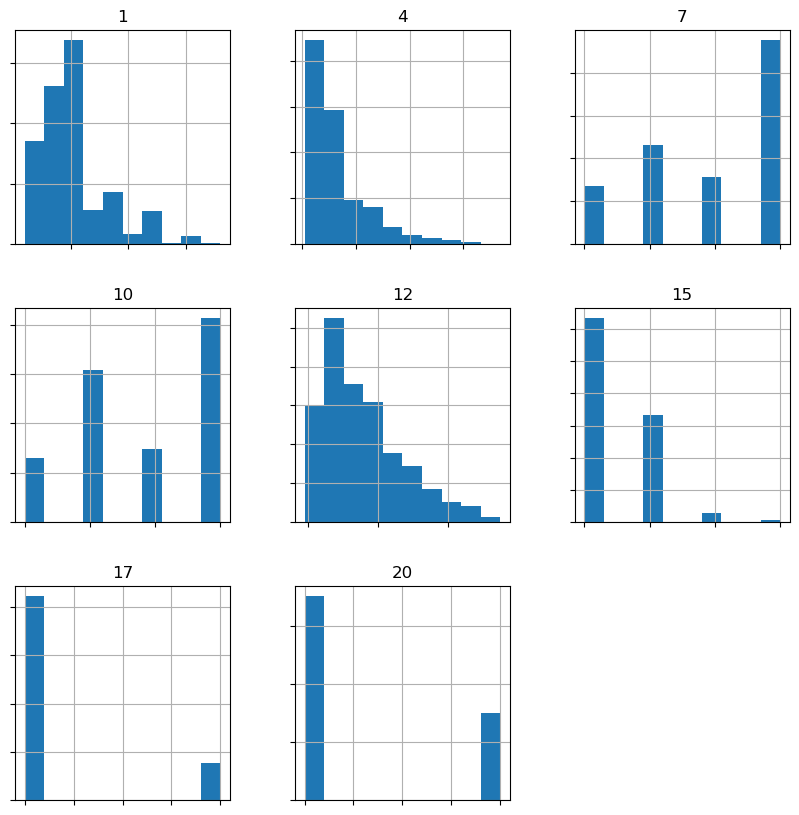

In [10]:
# create a histogram plot of each numeric variable
from matplotlib import pyplot
ax = subset.hist(figsize=(10, 10))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
# show the plot
pyplot.show()

<p>Running the example creates the figure with one histogram subplot for each of the seven input variables and one class label in the dataset. The title of each subplot indicates the column number in the DataFrame (e.g. zero-offset from 0 to 20).</p><p>We can see many different distributions, some with <a href="https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/">Gaussian-like distributions</a>, others with seemingly exponential or discrete distributions.</p><p>Depending on the choice of modeling algorithms, we would expect scaling the distributions to the same range to be useful, and perhaps the use of some power transforms.</p>

<p>Now that we have reviewed the dataset, let’s look at developing a test harness for evaluating candidate models.</p>

<h2>Model Test and Baseline Result</h2><p>We will evaluate candidate models using repeated stratified k-fold cross-validation.</p><p>The <a href="https://machinelearningmastery.com/k-fold-cross-validation/">k-fold cross-validation procedure</a> provides a good general estimate of model performance that is not too optimistically biased, at least compared to a single train-test split. We will use k=10, meaning each fold will contain about 1000/10 or 100 examples.</p><p>Stratified means that each fold will contain the same mixture of examples by class, that is about 70 percent to 30 percent good to bad customers. Repeated means that the evaluation process will be performed multiple times to help avoid fluke results and better capture the variance of the chosen model. We will use three repeats.</p><p>This means a single model will be fit and evaluated 10 * 3 or 30 times and the mean and standard deviation of these runs will be reported.</p><p>This can be achieved using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html">RepeatedStratifiedKFold scikit-learn class</a>.</p><p>We will predict class labels of whether a customer is good or not. Therefore, we need a measure that is appropriate for evaluating the predicted class labels.</p><p>The focus of the task is on the positive class (bad customers). Precision and recall are a good place to start. Maximizing precision will minimize the false positives and maximizing recall will minimize the false negatives in the predictions made by a model.</p><ul>
<li>Precision = TruePositives / (TruePositives + FalsePositives)</li>
<li>Recall = TruePositives / (TruePositives + FalseNegatives)</li>
</ul><p>Using the F-Measure we will calculate the <a href="https://www.mathsisfun.com/numbers/harmonic-mean.html">harmonic mean</a> between precision and recall. This is a good single number that can be used to compare and select a model on this problem. The issue is that false negatives are more damaging than false positives.</p>

<ul>
<li>F-Measure = (2 x Precision x Recall) / (Precision + Recall)</li>
</ul><p>Remember that false negatives on this dataset are cases of a bad customer being marked as a good customer and being given a loan. False positives are cases of a good customer being marked as a bad customer and not being given a loan.</p><ul>
<li><strong>False Negative</strong>: Bad Customer (class 1) predicted as a Good Customer (class 0).</li>
<li><strong>False Positive</strong>: Good Customer (class 0) predicted as a Bad Customer (class 1).</li>
</ul><p>False negatives are more costly to the bank than false positives.</p><ul>
<li>Cost(False Negatives) &gt; Cost(False Positives)</li>
</ul><p>Put another way, we are interested in the F-measure that will summarize a model’s ability to minimize misclassification errors for the positive class, but we want to favor models that are better at minimizing false negatives over false positives.</p><p>This can be achieved by using a version of the F-measure that calculates a weighted <a href="https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/">harmonic mean</a> of precision and recall but favors higher recall scores over precision scores. This is called the <a href="https://machinelearningmastery.com/fbeta-measure-for-machine-learning/">Fbeta-measure</a>, a generalization of F-measure, where “<em>beta</em>” is a parameter that defines the weighting of the two scores.</p><ul>
<li>Fbeta-Measure = ((1 + beta^2) x Precision x Recall) / (beta^2 x Precision + Recall)</li>
</ul><p>A beta value of 2 will weight more attention on recall than precision and is referred to as the F2-measure.</p><ul>
<li>F2-Measure = ((1 + 2^2) x Precision x Recall) / (2^2 x Precision + Recall)</li>
</ul><p>We will use this measure to evaluate models on the German credit dataset. This can be achieved using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html">fbeta_score() scikit-learn function</a>.</p><p>We can define a function to load the dataset and split the columns into input and output variables. We will one-hot encode the categorical variables and label encode the target variable. You might recall that a one-hot encoding replaces the categorical variable with one new column for each value of the variable and marks values with a 1 in the column for that value.</p><p>The complete example of loading the German Credit dataset, evaluating a baseline model, and reporting the performance is listed below.</p><p>First, we must split the DataFrame into input and output variables.</p>

In [11]:
# test harness and baseline model evaluation for the german credit dataset
from collections import Counter
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

<p>First, we must split the DataFrame into input and output variables.</p><p>Next, we need to select all input variables that are categorical, then apply a one-hot encoding and leave the numerical variables untouched.</p><p>This can be achieved using a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html">ColumnTransformer</a> and defining the transform as a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> applied only to the column indices for categorical variables.</p><p>We can then label encode the target variable.</p><p>The <em>load_dataset()</em> function below ties all of this together and loads and prepares the dataset for modeling.</p>

In [12]:
# load the dataset as a numpy array
def load_dataset(full_path):
    
    # load the dataset as a pandas dataframe
    dataframe = pd.read_csv(full_path, header=None)
    
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    
    # select categorical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    
    # one hot encode cat features only
    ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
    X = ct.fit_transform(X)
    
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y

<p>Next, we need a function that will evaluate a set of predictions using the <em>fbeta_score()</em> function with <em>beta</em> set to 2.</p>

In [13]:
# calculate f2 score
def f2(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

<p>We can then define a function that will evaluate a given model on the dataset and return a list of F2-Measure scores for each fold and repeat.</p>The evaluate_model() function below implements this, taking the dataset and model as arguments and returning the list of scores.

In [14]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

**n_jobs=-1**: This parameter specifies how many CPU cores to use for the computation. The value -1 means to use all available cores. This allows for parallel computation, making the cross-validation process faster, especially when evaluating on multiple splits.

In [15]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


In [16]:
X[:1],y[:1]

(array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
         6.000e+00, 1.169e+03, 4.000e+00, 4.000e+00, 6.700e+01, 2.000e+00,
         1.000e+00]]),
 array([0], dtype=int64))

<p>Finally, we can evaluate a baseline model on the dataset using this test harness.</p><p>A model that predicts the minority class for examples will achieve a maximum recall score and a baseline precision score. This provides a baseline in model performance on this problem by which all other models can be compared.</p><p>This can be achieved using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html">DummyClassifier</a> class from the scikit-learn library and setting the “<em>strategy</em>” argument to “<em>constant</em>” and the “<em>constant</em>” argument to “<em>1</em>” for the minority class.</p>

In [17]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)

<p>Once the model is evaluated, we can report the mean and standard deviation of the F2-Measure scores directly.</p>

In [18]:
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean F2: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean F2: 0.682 (0.000)


<p>Running the example first loads and summarizes the dataset.</p><p>We can see that we have the correct number of rows loaded, and through the one-hot encoding of the categorical input variables, we have increased the number of input variables from 20 to 61. That suggests that the 13 categorical variables were encoded into a total of 54 columns.</p><p>Importantly, we can see that the class labels have the correct mapping to integers with 0 for the majority class and 1 for the minority class, customary for imbalanced binary classification dataset.</p><p>Next, the average of the F2-Measure scores is reported.</p><p>In this case, we can see that the baseline algorithm achieves an F2-Measure of about 0.682. This score provides a lower limit on model skill; any model that achieves an average F2-Measure above about 0.682 has skill, whereas models that achieve a score below this value do not have skill on this dataset.</p><p>Now that we have a test harness and a baseline in performance, we can begin to evaluate some models on this dataset.</p>

<h2>Evaluate Models</h2><p>In this section, we will evaluate a suite of different techniques on the dataset using the test harness developed in the previous section.</p><p>The goal is to both demonstrate how to work through the problem systematically and to demonstrate the capability of some techniques designed for imbalanced classification problems.</p><p>The reported performance is good, but not highly optimized (e.g. hyperparameters are not tuned).</p><p><strong>Can you do better? </strong>If you can achieve better F2-Measure performance using the same test harness, I’d love to hear about it.</p>

<h3>Evaluate Machine Learning Algorithms</h3><p>Let’s start by evaluating a mixture of probabilistic machine learning models on the dataset.</p><p>It can be a good idea to spot check a suite of different linear and nonlinear algorithms on a dataset to quickly flush out what works well and deserves further attention, and what doesn’t.</p><p>We will evaluate the following machine learning models on the German credit dataset:</p><ul>
<li>Logistic Regression (LR)</li>
<li>Linear Discriminant Analysis (LDA)</li>
<li>Naive Bayes (NB)</li>
<li>Gaussian Process Classifier (GPC)</li>
<li>Support Vector Machine (SVM)</li>
<li>Decision Tree (DT)</li>
</ul><p>The complete example of evaluating a suite of machine learning algorithms on the German credit dataset is listed below.</p>

In [19]:
# spot check machine learning algorithms on the german credit dataset
from numpy import mean
from numpy import std
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

<p>We will one-hot encode the categorical input variables as we did in the previous section, and in this case, we will normalize the numerical input variables. This is best performed using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a> within each fold of the cross-validation evaluation process.</p><p>An easy way to implement this is to use a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a> where the first step is a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html">ColumnTransformer</a> that applies a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> to just the categorical variables, and a <em>MinMaxScaler</em> to just the numerical input variables. To achieve this, we need a list of the column indices for categorical and numerical input variables.</p><p>We can update the <em>load_dataset()</em> to return the column indexes as well as the input and output elements of the dataset. The updated version of this function is listed below.</p>

In [20]:
# load the dataset as a numpy array
def load_dataset(full_path):
    # load the dataset as a pandas dataframe
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [21]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [22]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

<p>We define each model in turn and add them to a list so that we can evaluate them sequentially. The <em>get_models()</em> function below defines the list of models for evaluation, as well as a list of model short names for plotting the results later.</p><p>We can then enumerate the list of models in turn and evaluate each, storing the scores for later evaluation.</p>

In [23]:
# define models to test
def get_models():
    # list of models and model names
    models, names = [], []
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # NB
    models.append(GaussianNB())
    names.append('NB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    # DT
    models.append(DecisionTreeClassifier())
    names.append('DT')
    return models, names

<p>We can then call the function (load_dataset) to get the data and the list of categorical and numerical variables.</p>

In [24]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define models
models, names = get_models()
# create a results list
results = []

In [25]:
print('Names:', (names))
print('Models:', (models))

Names: ['LR', 'LDA', 'NB', 'GPC', 'SVM', 'DT']
Models: [LogisticRegression(solver='liblinear'), LinearDiscriminantAnalysis(), GaussianNB(), GaussianProcessClassifier(), SVC(), DecisionTreeClassifier()]


In [26]:
X[:1],y[:1]

(array([['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4,
         'A121', 67, 'A143', 'A152', 2, 'A173', 1, 'A192', 'A201']],
       dtype=object),
 array([0], dtype=int64))

In [27]:
cat_ix,num_ix

(Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64'),
 Int64Index([1, 4, 7, 10, 12, 15, 17], dtype='int64'))

<p>This can be used to prepare a <em>Pipeline</em> to wrap each model prior to evaluating it.</p><p>First, the <em>ColumnTransformer</em> is defined, which specifies what transform to apply to each type of column, then this is used as the first step in a Pipeline that ends with the specific model that will be fit and evaluated.</p><p>We can summarize the mean F2-Measure for each algorithm; this will help to directly compare algorithms.</p>

In [28]:
# evaluate each model
for i in range(len(models)):
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # wrap the model i a pipeline
    pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores) 
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.498 (0.072)
>LDA 0.519 (0.072)
>NB 0.639 (0.049)
>GPC 0.219 (0.061)
>SVM 0.436 (0.077)
>DT 0.442 (0.089)


In [29]:
results[:1]

[array([0.62937063, 0.42253521, 0.50359712, 0.57432432, 0.52083333,
        0.48611111, 0.43165468, 0.43165468, 0.5033557 , 0.42553191,
        0.57823129, 0.52447552, 0.4964539 , 0.43478261, 0.48611111,
        0.55172414, 0.42553191, 0.47445255, 0.51724138, 0.49295775,
        0.48275862, 0.42553191, 0.46428571, 0.37931034, 0.65972222,
        0.68627451, 0.48507463, 0.53191489, 0.41666667, 0.4964539 ])]

In [30]:
import numpy as np
data = results[0]
mean_value = np.mean(data)
stdev = np.std(data)
print(mean_value, stdev)

0.4979641429755651 0.07168600123526696


<p>At the end of the run, we will create a separate box and whisker plot for each algorithm’s sample of results.</p><p>These plots will use the same y-axis scale so we can compare the distribution of results directly.</p>

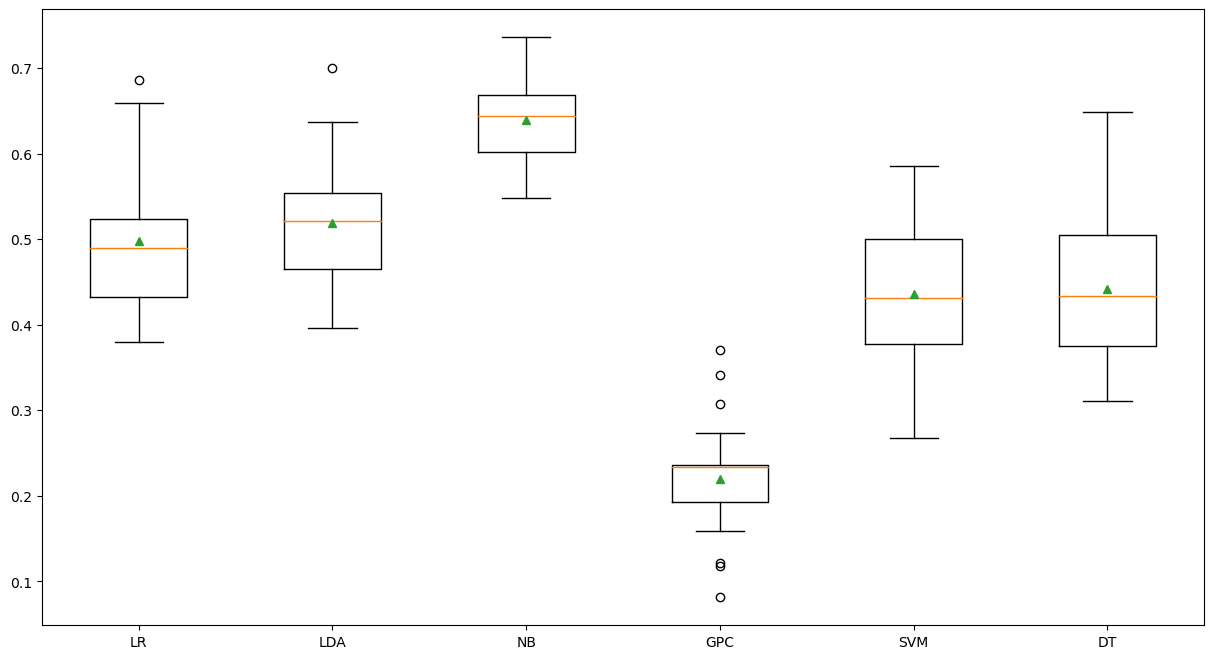

In [31]:
# plot the results
# Set the figure size (width, height) in inches
pyplot.figure(figsize=(15, 8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<p>Running the example evaluates each algorithm in turn and reports the mean and standard deviation F2-Measure.</p><p><strong>Note</strong>: Your <a href="https://machinelearningmastery.com/different-results-each-time-in-machine-learning/">results may vary</a> given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.</p><p>In this case, we can see that none of the tested models have an F2-measure above the default of predicting the minority class in all cases (0.682). None of the models are skillful. This is surprising, although suggests that perhaps the decision boundary between the two classes is noisy.</p><p>A figure is created showing one box and whisker plot for each algorithm’s sample of results. The box shows the middle 50 percent of the data, the orange line in the middle of each box shows the median of the sample, and the green triangle in each box shows the mean of the sample.</p>

### Understanding Box Plots
<p>Box plots, also known as whisker plots, are a graphical representation of the distribution of a dataset. They provide a visual summary that combines several important quantitative measures, making them especially useful for understanding the central tendency and variability of a dataset as well as identifying potential outliers.</p><p> In Python, the matplotlib and seaborn libraries are popular choices for creating box plots.</p>

### Components of a Box Plot:
<img src="Screenshot 2023-08-27 at 12.23.04.png" width=400, height=450>

1. **Median (Q2/50th Percentile)**: The median is the value that separates the higher half from the lower half of a data sample. It is represented by a line inside the box.

2. **First Quartile (Q1/25th Percentile)**: This is the median of the first half of the data (i.e., the data below the median). It's the bottom line of the box.

3. **Third Quartile (Q3/75th Percentile)**: This is the median of the second half of the data (i.e., the data above the median). It's the top line of the box.

4. **Interquartile Range (IQR)**: It's the range between Q3 and Q1 (IQR = Q3 - Q1). The height of the box represents this range, and it captures the middle 50% of the data.

5. **Whiskers**: The "T" lines that extend from the box. They can represent a range of data within a particular distance from the IQR or, in some cases, the minimum and maximum data values.

6. **Outliers**: Typically represented by dots or other markers outside of the whiskers. Outliers are data points that fall far from the other data points.

### Uses of Box Plots:
1. **Understanding Distribution**: You can quickly get a sense of the center, spread, and overall range of the data.

2. **Detecting Outliers**: Outliers are displayed outside the "whiskers" of the box plot, allowing for easy identification.

3. **Comparing Distributions**: When you have data from multiple groups or categories, you can use side-by-side box plots to compare their distributions.

4. **Visualizing Skewness**: If the data is skewed, the median might be closer to Q1 or Q3, and one whisker might be notably longer than the other.

5. **Evaluating Spread and Symmetry**: The IQR and the position of the median can give insights into the variability and symmetry of the data distribution.

<p>In conclusion, box plots are a concise way of graphically summarizing the distribution of a dataset. They are particularly useful for comparing distributions across different categories or groups and for identifying outliers.</p>

<p>Now that we have some results, let’s see if we can improve them with some undersampling.</p>

<h3>Evaluate Undersampling</h3><p>Undersampling is perhaps the least widely used technique when addressing an imbalanced classification task as most of the focus is put on oversampling the majority class with SMOTE (Synthetic Minority Over-sampling Technique).</p><p>Undersampling can help to remove examples from the majority class along the decision boundary that make the problem challenging for classification algorithms.</p><p>In this experiment we will test the following undersampling algorithms:</p><ul>
<li>Tomek Links (TL)</li>
<li>Edited Nearest Neighbors (ENN)</li>
<li>Repeated Edited Nearest Neighbors (RENN)</li>
<li>One Sided Selection (OSS)</li>
<li>Neighborhood Cleaning Rule (NCR)</li>
<li>NearMiss (NM)</li>
</ul><p>The Tomek Links and ENN methods select examples from the majority class to delete, whereas OSS and NCR both select examples to keep and examples to delete. NM undersamples by selecting majority samples based on the distance to minority class samples. We will use the balanced version of the logistic regression algorithm to test each undersampling method, to keep things simple.</p><p>The complete example of evaluating logistic regression with different undersampling methods on the German credit dataset is listed below.</p><p>We would expect the undersampling to to result in a lift on skill in logistic regression, ideally above the baseline performance of predicting the minority class in all cases.</p><p>The complete example is listed below.</p>

In [32]:
# evaluate undersampling with logistic regression on the imbalanced german credit dataset
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
from sklearn.calibration import CalibratedClassifierCV

<p>We will one-hot encode the categorical input variables as we did in the previous section, and in this case, we will normalize the numerical input variables. This is best performed using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler</a> within each fold of the cross-validation evaluation process.</p><p>An easy way to implement this is to use a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a> where the first step is a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html">ColumnTransformer</a> that applies a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> to just the categorical variables, and a <em>MinMaxScaler</em> to just the numerical input variables. To achieve this, we need a list of the column indices for categorical and numerical input variables.</p><p>We can update the <em>load_dataset()</em> to return the column indexes as well as the input and output elements of the dataset. The updated version of this function is listed below.</p>

In [33]:
# load the dataset as a numpy array
def load_dataset(full_path):
    # load the dataset as a pandas dataframe
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [34]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [35]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

<p>The <em>get_models()</em> function from the previous section can be updated to return a list of undersampling techniques to test with the logistic regression algorithm. We use the implementations of these algorithms from the imbalanced-learn library.</p><p>The updated version of the <em>get_models()</em> function defining the undersampling methods is listed below.</p>

In [36]:
# define undersampling models to test
def get_models():
    models, names = [], []
    # TL
    models.append(TomekLinks())
    names.append('TL')
    # ENN
    models.append(EditedNearestNeighbours())
    names.append('ENN')
    # RENN
    models.append(RepeatedEditedNearestNeighbours())
    names.append('RENN')
    # OSS
    models.append(OneSidedSelection())
    names.append('OSS')
    # NCR
    models.append(NeighbourhoodCleaningRule())
    names.append('NCR')
    # NM
    models.append(NearMiss())
    names.append('NM')
    return models, names

In [37]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)
# define models
models, names = get_models()
results = []

In [38]:
print('Names:', (names))
print('Models:', (models))

Names: ['TL', 'ENN', 'RENN', 'OSS', 'NCR', 'NM']
Models: [TomekLinks(), EditedNearestNeighbours(), RepeatedEditedNearestNeighbours(), OneSidedSelection(), NeighbourhoodCleaningRule(), NearMiss()]


<p>The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Pipeline</a> provided by scikit-learn does not know about undersampling algorithms. Therefore, we must use the <a href="https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.pipeline.Pipeline.html">Pipeline</a> implementation provided by the <a href="https://imbalanced-learn.readthedocs.io/en/stable/">imbalanced-learn library</a>.</p><p>As in the previous section, the first step of the pipeline will be one hot encoding of categorical variables and normalization of numerical variables, and the final step will be fitting the model. Here, the middle step will be the undersampling technique, correctly applied within the cross-validation evaluation on the training dataset only.</p>

In [39]:
# evaluate each model
for i in range(len(models)):
    # define model to evaluate
    model = LogisticRegression(solver='liblinear', class_weight='balanced')
    # one hot encode categorical, normalize numerical
    ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
    # scale, then undersample, then fit model
    pipeline = Pipeline(steps=[('t',ct), ('s', models[i]), ('m',model)])
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores))) 

>TL 0.669 (0.057)
>ENN 0.706 (0.048)
>RENN 0.714 (0.041)
>OSS 0.671 (0.056)
>NCR 0.693 (0.052)
>NM 0.652 (0.050)


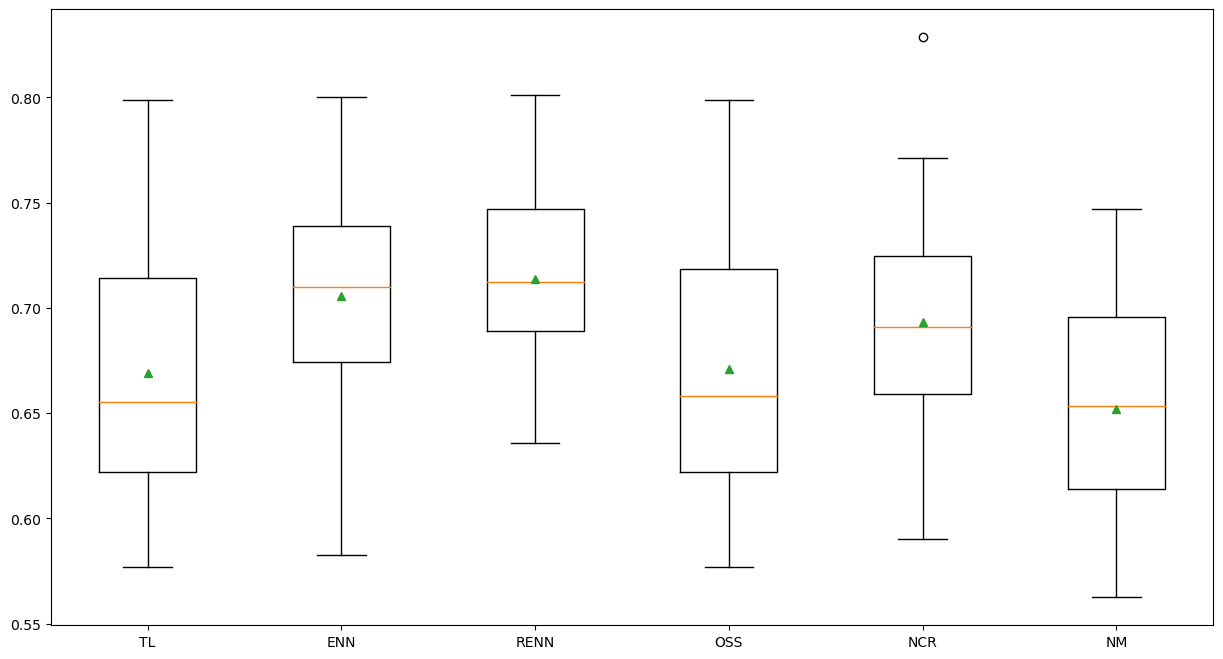

In [40]:
import warnings
warnings.filterwarnings("ignore")
# plot the results
# Set the figure size (width, height) in inches
pyplot.figure(figsize=(15, 8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<p>Running the example evaluates the logistic regression algorithm with five different undersampling techniques.</p><p><strong>Note</strong>: Your <a href="https://machinelearningmastery.com/different-results-each-time-in-machine-learning/">results may vary</a> given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.</p><p>In this case, we can see that three of the six undersampling techniques resulted in an F2-measure that provides an improvement over the baseline of 0.682. Specifically, ENN, RENN and NCR, with repeated edited nearest neighbors resulting in the best performance with an F2-measure of about 0.714.</p>

<p>Box and whisker plots are created for each evaluated undersampling technique, showing that they generally have the same spread.</p><p>It is encouraging to see that for the well performing methods, the boxes spread up around 0.8, and the mean and median for all three methods are are around 0.7. This highlights that the distributions are skewing high and are let down on occasion by a few bad evaluations.</p>

<p>Next, let’s see how we might use a final model to make predictions on new data.</p>

<h3>Further Model Improvements</h3><p>This is a new section that provides a minor departure to the above section. Here, we will test specific models that result in a further lift in F2-measure performance and I will update this section as new models are reported/discovered.</p><h4>Improvement #1: InstanceHardnessThreshold</h4><p>An F2-measure of about <strong>0.727</strong>&nbsp;can be achieved using balanced Logistic Regression with <a href="https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.InstanceHardnessThreshold.html">InstanceHardnessThreshold</a> undersampling.</p><p>The complete example is listed below.</p>

In [41]:
# improve performance on the imbalanced german credit dataset
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import InstanceHardnessThreshold

In [42]:
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [43]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [44]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [45]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)

In [46]:
# define model to evaluate
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# define the data sampling
sampling = InstanceHardnessThreshold()
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# scale, then sample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', sampling), ('m',model)])
# evaluate the model and store results
scores = evaluate_model(X, y, pipeline)
print('%.3f (%.3f)' % (mean(scores), std(scores)))

0.724 (0.036)


<p>Running the example gives the follow results.</p><p></p><p><strong>Note</strong>: Your <a href="https://machinelearningmastery.com/different-results-each-time-in-machine-learning/">results may vary</a> given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.</p>

<h4>Improvement #2: SMOTEENN (SMOTE and Edited Nearest Neighbours.)</h4><p>An F2-measure of about <strong>0.730</strong>&nbsp;can be achieved using LDA with <a href="https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTEENN.html">SMOTEENN</a>, where the ENN parameter is set to an ENN instance with sampling_strategy set to majority.</p><p>The complete example is listed below.</p>

In [47]:
# improve performance on the imbalanced german credit dataset
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [48]:
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [49]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [50]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [51]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)

In [52]:
# define model to evaluate
model = LinearDiscriminantAnalysis()
# define the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# scale, then sample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', sampling), ('m',model)])
# evaluate the model and store results
scores = evaluate_model(X, y, pipeline)
print('%.3f (%.3f)' % (mean(scores), std(scores)))

0.730 (0.039)


In [53]:
# define model to evaluate
model = LinearDiscriminantAnalysis()
# wrap the model
model = CalibratedClassifierCV(model, method='sigmoid', cv=3)
# define the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# scale, then sample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', sampling), ('m',model)])
# evaluate the model and store results
scores = evaluate_model(X, y, pipeline)
print('%.3f (%.3f)' % (mean(scores), std(scores)))

0.728 (0.044)


<p>Running the example gives the follow results.</p><p></p><p><strong>Note</strong>: Your <a href="https://machinelearningmastery.com/different-results-each-time-in-machine-learning/">results may vary</a> given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.</p>

<h4>Improvement #3: SMOTEENN with StandardScaler and RidgeClassifier</h4><p>An F2-measure of about <strong>0.737</strong> can be achieved with further improvements to the SMOTEENN using a RidgeClassifier instead of LDA and using a StandardScaler for the numeric inputs instead of a MinMaxScaler.</p><p>The complete example is listed below.</p>

In [54]:
# improve performance on the imbalanced german credit dataset
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import RidgeClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [55]:
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [56]:
# calculate f2-measure
def f2_measure(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [57]:
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the model evaluation metric
    metric = make_scorer(f2_measure)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [58]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)

In [59]:
# define model to evaluate
model = RidgeClassifier()
# define the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',StandardScaler(),num_ix)])
# scale, then sample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', sampling), ('m',model)])
# evaluate the model and store results
scores = evaluate_model(X, y, pipeline)
print('%.3f (%.3f)' % (mean(scores), std(scores)))

0.741 (0.031)


In [60]:
# define model to evaluate
model = RidgeClassifier(alpha = 1.0, class_weight='balanced')
# wrap the model
model = CalibratedClassifierCV(model, method='sigmoid', cv=3)
# define the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',StandardScaler(),num_ix)])
# scale, then sample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', sampling), ('m',model)])
# evaluate the model and store results
scores = evaluate_model(X, y, pipeline)
print('%.3f (%.3f)' % (mean(scores), std(scores)))

0.732 (0.033)


<p>Running the example gives the above results.</p><p></p><p><strong>Note</strong>: Your <a href="https://machinelearningmastery.com/different-results-each-time-in-machine-learning/">results may vary</a> given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.</p>

<h2>Make Prediction on New Data</h2><p>Given the variance in results, a selection of any of the undersampling methods is probably sufficient. In this case, we will select logistic regression with Repeated ENN.</p><p>This model had an F2-measure of about about 0.714 on our test harness.</p><p>We will use this as our final model and use it to make predictions on new data.</p>

In [61]:
# fit a model and make predictions for the german credit dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

In [62]:
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [63]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)

<p>We define the model as a pipeline.</p>

In [64]:
# define model to evaluate
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
# scale, then undersample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', RepeatedEditedNearestNeighbours()), ('m',model)])
# fit the model
pipeline.fit(X, y)

Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('c', OneHotEncoder(),
                                                  Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')),
                                                 ('n', MinMaxScaler(),
                                                  Int64Index([1, 4, 7, 10, 12, 15, 17], dtype='int64'))])),
                ('s', RepeatedEditedNearestNeighbours()),
                ('m',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

<p>Once fit, we can use it to make predictions for new data by calling the <em>predict()</em> function. This will return the class label of 0 for “<em>good customer</em>”, or 1 for “<em>bad customer</em>”.</p><p>Importantly, we must use the <em>ColumnTransformer</em> that was fit on the training dataset in the <em>Pipeline</em> to correctly prepare new data using the same transforms.</p>

In [65]:
# evaluate on some good customers cases (known class 0)
print('Good Customers:')
data = [['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67, 'A143', 'A152', 2, 'A173', 1, 'A192', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]#predictions
    # summarize
    print('>Predicted=%d (expected 0)' % (label))
# evaluate on some bad customers (known class 1)
print('Bad Customers:')
data = [['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37, 'A142', 'A152', 1, 'A173', 1, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 1)' % (label))

Good Customers:
>Predicted=0 (expected 0)
Bad Customers:
>Predicted=1 (expected 1)


In [66]:
# evaluate on some good customers cases (known class 0)
print('Good Customers:')
data = [['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67, 'A143', 'A152', 2, 'A173', 1, 'A192', 'A201'],
    ['A14', 12, 'A34', 'A46', 2096, 'A61', 'A74', 2, 'A93', 'A101', 3, 'A121', 49, 'A143', 'A152', 1, 'A172', 2, 'A191', 'A201'],
    ['A11', 42, 'A32', 'A42', 7882, 'A61', 'A74', 2, 'A93', 'A103', 4, 'A122', 45, 'A143', 'A153', 1, 'A173', 2, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 0)' % (label))
# evaluate on some bad customers (known class 1)
print('Bad Customers:')
data = [['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37, 'A142', 'A152', 1, 'A173', 1, 'A191', 'A201'],
    ['A11', 24, 'A33', 'A40', 4870, 'A61', 'A73', 3, 'A93', 'A101', 4, 'A124', 53, 'A143', 'A153', 2, 'A173', 2, 'A191', 'A201'],
    ['A11', 24, 'A32', 'A43', 1282, 'A62', 'A73', 4, 'A92', 'A101', 2, 'A123', 32, 'A143', 'A152', 1, 'A172', 1, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 1)' % (label))

Good Customers:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=1 (expected 0)
Bad Customers:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)


In [67]:
last_ix = len(dataframe.columns) - 1
data = dataframe.drop(last_ix, axis=1).values[:50]
y = dataframe[last_ix]
y = LabelEncoder().fit_transform(y)

# Counter for cases where expected is 1 and predicted is 0
counter = 0
# Iterate through the data and make predictions,i for labels and row is for features
for i, row in enumerate(data):
    # Make a prediction
    yhat = pipeline.predict([row])
    
    # Get the predicted and actual labels
    predicted_label = yhat[0]
    actual_label = y[i]
    
    # Print the results
    print(f'> Predicted={predicted_label} (expected={actual_label})')
    
    # Check if expected is 1 and predicted is 0
    if actual_label == 1 and predicted_label == 0:
        counter += 1

print(f'Number of cases where expected is 1 and predicted is 0: {counter}')


> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=1 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=1)
> Predicted=1 (expected=1)
> Predicted=1 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=1 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=0)
> Predicted=1 (expected=0)
> Predicted=1 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=0)
>

In [68]:
from sklearn import metrics, preprocessing
yhat = pipeline.predict(X)
cm = metrics.confusion_matrix(y, yhat)
print(cm)
# Extract and print the False Negative count
false_negatives = cm[1, 0]
print(f"False Negatives: {false_negatives}")

[[415 285]
 [ 36 264]]
False Negatives: 36


### German dataset cost matrix

~~~~
                               Actual "+"(0)       Actual  "-"(1)

      Model says: "+"(0)            0          |        1
                             -------------------------------------
      Model says: "-"(1)            5          |        0
  
~~~~

Misclassification cost of this model => (5 x 36) + (285 x 1) = 465

### Model Serialization
Serialization of a machine learning (ML) model refers to the process of converting the model's internal state and structure into a format that can be easily stored and later reconstructed. In other words, serialization allows you to save a trained ML model to a file so that you can load and use it again in the future without having to retrain it from scratch. This is particularly useful for sharing, deploying, or archiving trained models.

When a model is serialized, its parameters, coefficients, hyperparameters, and any other relevant information are saved in a structured format that preserves the model's structure and learned patterns. The serialization process ensures that the model can be accurately reconstructed when it's deserialized (loaded) later.

Serialization is especially important when you want to:

1. **Share Models**: You can share your trained model with others, allowing them to use it without needing to access your original training data and code.

2. **Deploy Models**: When deploying ML models in production environments, you can serialize the trained model and load it on demand for making predictions.

3. **Archive Models**: Saving serialized models ensures that you can replicate results or continue using specific models even if the original training data or code is no longer available.

4. **Caching**: Serializing models can be useful for caching predictions in scenarios where making predictions is computationally expensive. You can save predictions alongside their inputs and reload the model to avoid repeated computations.

Common serialization formats include:

1. **Pickle (Python)**: Python's pickle module is a built-in way to serialize Python objects, including ML models. However, it's important to note that pickle might not be the best choice for large models or for sharing models across different Python versions.

2. **Joblib**: The joblib library, often used in conjunction with scikit-learn, is optimized for efficiently saving and loading large numpy arrays, which are common in machine learning models.

3. **ONNX (Open Neural Network Exchange)**: ONNX is an open format for representing machine learning models. It enables interoperability between different frameworks and platforms.

4. **HDF5 (Hierarchical Data Format)**: HDF5 is a versatile format that can store complex datasets, including machine learning models.

Serialization is a crucial part of the machine learning workflow, enabling the transfer of models from development to production and facilitating collaboration and reproducibility.

### Saving final model to disk using Pickle
Import **pickle** module, which provides functionality for serializing (pickling) and deserializing (unpickling) Python objects.
### Serializing and Saving the Model to Disk:
We use the **pickle.dump()** function to serialize the **model** object and save it to a file named **LR_RENN.pkl**. Here's what each argument means:

- **model**: The object you want to serialize and save.
- **open('LR_RENN.pkl', 'wb')**: Opens the file **LR_RENN.pkl** in binary write mode **('wb')** for writing serialized data into it.

### Saving the Pipeline to Disk:
Similar to the model, the **pipeline** object is also serialized using **pickle.dump()** and saved to a file named **pipeline.pkl**.

This is how to save a trained LogisticRegression model and/or a pipeline containing data preprocessing steps and the model to separate files using the pickle module. This allows you to later load and reuse the trained model and pipeline without having to retrain them. It's important to note that while pickle is a convenient way to save models, it may not always be the most secure or efficient method, particularly in situations where compatibility between different Python versions or security are concerns.

In [69]:
# Saving Model to disk
import pickle
# Creating and Configuring the Model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# Saving Model to Disk using pickle
pickle.dump(model,open('LR_RENN.pkl','wb'))
# Save pipeline to disk
pickle.dump(pipeline, open('pipeline.pkl','wb'))

### Saving final model to disk using joblib library
You can achieve the same result using the joblib library, which is often preferred for serializing scikit-learn models due to its improved performance on large numpy arrays. Here's how you can save the models to disk using joblib:

In [81]:
import joblib
# Creating and Configuring the Model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# Saving Model to Disk using joblib
joblib.dump(model, 'LR_RENN.joblib')
# Save pipeline to disk
joblib.dump(pipeline, 'pipeline.joblib')


['pipeline.joblib']

In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks 

In [83]:
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    dataframe = pd.read_csv(full_path, header=None)
    # split into inputs and outputs
    last_ix = len(dataframe.columns) - 1
    X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
    # select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

In [84]:
# define the location of the dataset
full_path = 'german.csv'
# load the dataset
X, y, cat_ix, num_ix = load_dataset(full_path)

In [85]:

# Define the new model
model = RandomForestClassifier(n_estimators=100)  # Change to your desired model

# Define the new preprocessing steps, which may include one-hot encoding and normalization
ct = ColumnTransformer([
    ('c', OneHotEncoder(drop='first'), cat_ix),
    ('n', MinMaxScaler(), num_ix)
])

# Define the new undersampling technique
undersampler = TomekLinks(sampling_strategy='majority')  # Change to your desired undersampling technique

# Create the new pipeline
pipeline = Pipeline(steps=[
    ('t', ct),
    ('s', undersampler),
    ('m', model)
])

# Fit the new model
pipeline.fit(X, y)


Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('c',
                                                  OneHotEncoder(drop='first'),
                                                  Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')),
                                                 ('n', MinMaxScaler(),
                                                  Int64Index([1, 4, 7, 10, 12, 15, 17], dtype='int64'))])),
                ('s', TomekLinks(sampling_strategy='majority')),
                ('m', RandomForestClassifier())])

In [86]:
# Evaluate on some good customers cases (known class 0)
print('Good Customers:')
data = [['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67, 'A143', 'A152', 2, 'A173', 1, 'A192', 'A201']]
for row in data:
    # Make prediction using the pipeline
    yhat = pipeline.predict([row])
    
    # Get the predicted label
    label = yhat[0]
    
    # Summarize the prediction
    print('> Predicted=%d (expected 0)' % (label))

# Evaluate on some bad customers (known class 1)
print('Bad Customers:')
data = [['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37, 'A142', 'A152', 1, 'A173', 1, 'A191', 'A201']]
for row in data:
    # Make prediction using the pipeline
    yhat = pipeline.predict([row])
    
    # Get the predicted label
    label = yhat[0]
    
    # Summarize the prediction
    print('> Predicted=%d (expected 1)' % (label))


Good Customers:
> Predicted=0 (expected 0)
Bad Customers:
> Predicted=1 (expected 1)


In [87]:
# evaluate on some good customers cases (known class 0)
print('Good Customers:')
data = [['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67, 'A143', 'A152', 2, 'A173', 1, 'A192', 'A201'],
    ['A14', 12, 'A34', 'A46', 2096, 'A61', 'A74', 2, 'A93', 'A101', 3, 'A121', 49, 'A143', 'A152', 1, 'A172', 2, 'A191', 'A201'],
    ['A11', 42, 'A32', 'A42', 7882, 'A61', 'A74', 2, 'A93', 'A103', 4, 'A122', 45, 'A143', 'A153', 1, 'A173', 2, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 0)' % (label))
# evaluate on some bad customers (known class 1)
print('Bad Customers:')
data = [['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37, 'A142', 'A152', 1, 'A173', 1, 'A191', 'A201'],
    ['A11', 24, 'A33', 'A40', 4870, 'A61', 'A73', 3, 'A93', 'A101', 4, 'A124', 53, 'A143', 'A153', 2, 'A173', 2, 'A191', 'A201'],
    ['A11', 24, 'A32', 'A43', 1282, 'A62', 'A73', 4, 'A92', 'A101', 2, 'A123', 32, 'A143', 'A152', 1, 'A172', 1, 'A191', 'A201']]
for row in data:
    # make prediction
    yhat = pipeline.predict([row])
    # get the label
    label = yhat[0]
    # summarize
    print('>Predicted=%d (expected 1)' % (label))

Good Customers:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
Bad Customers:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)


In [88]:
last_ix = len(dataframe.columns) - 1
data = dataframe.drop(last_ix, axis=1).values[:50]
y = dataframe[last_ix]
y = LabelEncoder().fit_transform(y)

# Counter for cases where expected is 1 and predicted is 0
counter = 0
# Iterate through the data and make predictions,i for labels and row is for features
for i, row in enumerate(data):
    # Make a prediction
    yhat = pipeline.predict([row])
    
    # Get the predicted and actual labels
    predicted_label = yhat[0]
    actual_label = y[i]
    
    # Print the results
    print(f'> Predicted={predicted_label} (expected={actual_label})')
    
    # Check if expected is 1 and predicted is 0
    if actual_label == 1 and predicted_label == 0:
        counter += 1

print(f'Number of cases where expected is 1 and predicted is 0: {counter}')


> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=1)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=1 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=0 (expected=0)
> Predicted=1 (expected=1)
> Predicted=0 (expected=0)
>

In [89]:
from sklearn import metrics, preprocessing
yhat = pipeline.predict(X)
cm = metrics.confusion_matrix(y, yhat)
print(cm)
# Extract and print the False Negative count
false_negatives = cm[1, 0]
print(f"False Negatives: {false_negatives}")

[[688  12]
 [  0 300]]
False Negatives: 0
